# Exam in EBA 3500
All subtasks are equally weighted. There are 20 subtasks in total, giving you roughly 
10 minutes for each. 

1. Don't spend too much time on any given exercise - come back to it later if you have 
   enough time left!
2. You don't have to make pretty legends for plots.

Good luck!

## Task 1: Variable slopes
In this task we will use the `fair` dataset from `statsmodels`. Please consult the [documentation](https://www.statsmodels.org/dev/datasets/generated/fair.html) for more information about the variables.

In [10]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
fair = sm.datasets.fair.load_pandas().data
fair.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


### (a) Fix the data set
Some of the columns in the data set have the incorrect type. In fact, there are only `float64` types in this data set. 
1. Demonstrate that all the columns in this data set are `float64` using an appropriate method.
2. Change the numerical covariates that **should** be categorical (or ordinal) into categorical. Print the types of the column after changing types.

#### Solution

In [14]:
# 1. The data types are float.
fair.dtypes

rate_marriage      float64
age                float64
yrs_married        float64
children           float64
religious          float64
educ               float64
occupation         float64
occupation_husb    float64
affairs            float64
dtype: object

In [15]:
# 2. Change datatypes.
fair.religious = fair.religious.astype("category")
fair.rate_marriage = fair.rate_marriage.astype("category")
fair.educ = fair.educ.astype("category")
fair.occupation = fair.occupation.astype("category")
fair.occupation_husb = fair.occupation_husb.astype("category")
fair.dtypes

rate_marriage      category
age                 float64
yrs_married         float64
children            float64
religious          category
educ               category
occupation         category
occupation_husb    category
affairs             float64
dtype: object

### (b) Several intercepts
Fit a suitable linear model with response `affairs` and covariates `rate_marriage` and `age`.
Show its output. This can be regarded as a model with several intercepts. Why?

#### Solution
The model has one intercept for each "rate_marriage" category, hence it has several intercepts.

In [16]:
#### Solution
import statsmodels.formula.api as smf
smf.ols("affairs ~ rate_marriage + age", data = fair).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     63.42
Date:                Sun, 05 Dec 2021   Prob (F-statistic):           8.91e-65
Time:                        11:12:00   Log-Likelihood:                -13907.
No. Observations:                6366   AIC:                         2.783e+04
Df Residuals:                    6360   BIC:                         2.787e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.4016      0.254      9.437      0.000       1.903       2.900
rate_marriage[T.2.0]     0.2952      0.245      1.203      0.229      -0.186       0.776
rate_marriage[T.3.0]     0.0343      0.227      0.151      0.880      -0.411       0.480
rate_marriage[T.4.0]    -0.7030      0.222     -3.170      0.002      -1.138      -0.268
rate_marriage[T.5.0]    -1.0397      0.221     -4.701      0.000      -1.473      -0.606
age                     -0.0355      0.004     -8.940      0.000      -0.043      -0.028
==============================================================================
Omnibus:                     9404.487   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5230290.135
Skew:                           8.849   Prob(JB):                         0.00
Kurtosis:                     142.302   Cond. No.                         551.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### (c) Categorical covariates (i)
The coefficient `rate_marriage[T.3.0]` in the model used in (b) is not significant. Modify the model in (b) to run with `rate_marriage[T.3.0]` removed. Is the model fit improved?

#### Solution
The adjusted $R^2$ is essentially the same, hence the model fit isn't improved.

In [49]:
smf.ols("affairs ~ I(fair.rate_marriage == 2.0) + I(fair.rate_marriage == 4.0) + I(fair.rate_marriage == 5.0) + age", data = fair).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     79.29
Date:                Sun, 05 Dec 2021   Prob (F-statistic):           9.49e-66
Time:                        12:41:15   Log-Likelihood:                -13907.
No. Observations:                6366   AIC:                         2.782e+04
Df Residuals:                    6361   BIC:                         2.786e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                2.4339      0.137     17.809      0.000       2.166       2.702
I(fair.rate_marriage == 2.0)[T.True]     0.2640      0.132      1.994      0.046       0.004       0.524
I(fair.rate_marriage == 4.0)[T.True]    -0.7342      0.080     -9.224      0.000      -0.890      -0.578
I(fair.rate_marriage == 5.0)[T.True]    -1.0709      0.078    -13.813      0.000      -1.223      -0.919
age                                     -0.0355      0.004     -8.971      0.000      -0.043      -0.028
==============================================================================
Omnibus:                     9404.864   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5231120.341
Skew:                           8.850   Prob(JB):                         0.00
Kurtosis:                     142.313   Cond. No.                         184.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### (d) Categorical covariates (ii)
Would you recommend removing `rate_marriage[T.3.0]` from the model? Why, or why not?

#### Solution
I wouldn't recommend removing `rate_marriage = 3` from the model, as it makes it harder to interpret and doens't improve the fit.

### (e) Coding of `rate_marriage`
Explain what a coding of an ordinal variables is. Judging from the regression output, do you think there is a reasonable coding for `rate_marriage`? (***Hint:*** Plot the values of `rate_marriage[T.2.0]` through `rate_marriage[T.5.0]`).


#### Solution
(i) A coding of an ordinal variable is a function that maps the levels of the variable
to the real numbers in a way that respects the order of the levels.
(ii) The plot shows that the effect of `rate_marriage` is roughly linear, and it's reasonable
to run a regression without transforming `rate_marriage` to categorical.

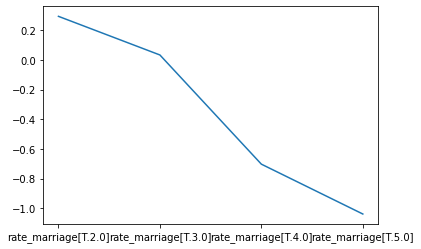

In [54]:
fit = smf.ols("affairs ~ rate_marriage + age", data = fair).fit()
plt.plot(fit.params[1:5])

### (f) Several intercepts and several slopes.
Fit a suitable model with response `affairs` and covariates `rate_marriage` and `age`. But this time, make sure that there is a separate `age` slope for each value of `rate_marriage`. Show the output of the model.


#### Solution

In [55]:
smf.ols("affairs ~ rate_marriage * age + age", data = fair).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     41.64
Date:                Sun, 05 Dec 2021   Prob (F-statistic):           5.47e-73
Time:                        12:54:21   Log-Likelihood:                -13879.
No. Observations:                6366   AIC:                         2.778e+04
Df Residuals:                    6356   BIC:                         2.785e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    3.9152      1.062      3.686      0.000       1.833       5.997
rate_marriage[T.2.0]         1.1278      1.176      0.959      0.337      -1.177       3.433
rate_marriage[T.3.0]        -0.2795      1.105     -0.253      0.800      -2.445       1.886
rate_marriage[T.4.0]        -2.4433      1.081     -2.260      0.024      -4.563      -0.324
rate_marriage[T.5.0]        -3.1626      1.077     -2.937      0.003      -5.273      -1.052
age                         -0.0802      0.031     -2.609      0.009      -0.141      -0.020
rate_marriage[T.2.0]:age    -0.0322      0.035     -0.929      0.353      -0.100       0.036
rate_marriage[T.3.0]:age     0.0048      0.032      0.148      0.883      -0.059       0.068
rate_marriage[T.4.0]:age     0.0526      0.031      1.670      0.095      -0.009       0.114
rate_marriage[T.5.0]:age     0.0661      0.031      2.109      0.035       0.005       0.128
==============================================================================
Omnibus:                     9415.755   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5360019.001
Skew:                           8.860   Prob(JB):                         0.00
Kurtosis:                     144.044   Cond. No.                     3.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### (g) Choice of model
Which model do you prefer? The one from (b) or the one from (f)? Give a short explanation why.

#### Solution
I prefer the larger model, since it has a larger $R^2$.

### (h) Plot the model in (f)
Make a plot that illustrates how the fitted values of the model in (f) varies together
with `age` and `rate_marriage`. It should display all possible values of 
`rate_marriage`. A reasonable range of ages is `17.5` to `42.0`.



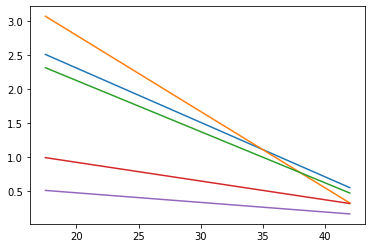

In [66]:
#### Solution
params = smf.ols("affairs ~ rate_marriage * age + age", data = fair).fit().params
params

ages = np.linspace(17.5, 42.0, 100)
plt.plot(ages, params["Intercept"] + params["age"] * ages)
for i in range(4):
    plt.plot(ages, params["Intercept"] + params[i + 1] + (params["age"] + params[i + 6]) * ages)

## Task 2: Binary regression
In this task we will use the `modechoice` dataset from `statsmodels`. Please consult the [documentation](https://www.statsmodels.org/dev/datasets/generated/modechoice.html) for more information about the variables.

In [17]:
import statsmodels.api as sm
modechoice = sm.datasets.modechoice.load_pandas().data
modechoice.head()

,individual,mode,choice,ttme,invc,invt,gc,hinc,psize
0,1.0,1.0,0.0,69.0,59.0,100.0,70.0,35.0,1.0
1,1.0,2.0,0.0,34.0,31.0,372.0,71.0,35.0,1.0
2,1.0,3.0,0.0,35.0,25.0,417.0,70.0,35.0,1.0
3,1.0,4.0,1.0,0.0,10.0,180.0,30.0,35.0,1.0
4,2.0,1.0,0.0,64.0,58.0,68.0,68.0,30.0,2.0


### (a) First look at the data
1. Create a plot that gives a rought overview of the data. (***Hint:*** Make a "pairplot" of the data.)
2. Make a correlation plot. We care mostly about `choice`. Do any of the them stand out? (***Hint:*** To make the correlation plot clearer, use e.g. [this](https://stackoverflow.com/a/50703596) to easily visualize the correlation plot.)

#### Solution
We use `pairplot` to plot the data and the hint to plot the correlation matrix. We see that
`ttme`, `gc` and `invt` are highly correlated with `choice`.

In [28]:
corr = modechoice.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\jonas\AppData\Local\Temp/ipykernel_2072/1836910583.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,individual,mode,choice,ttme,invc,invt,gc,hinc,psize
individual,1.00,-0.00,0.00,-0.02,0.01,0.01,0.02,0.05,0.05
mode,-0.00,1.00,-0.04,-0.79,-0.73,0.50,-0.09,-0.00,0.00
choice,0.00,-0.04,1.00,-0.22,-0.01,-0.11,-0.08,0.00,0.00
ttme,-0.02,-0.79,-0.22,1.00,0.58,-0.33,0.16,0.01,0.10
invc,0.01,-0.73,-0.01,0.58,1.00,-0.16,0.52,0.08,-0.12
invt,0.01,0.50,-0.11,-0.33,-0.16,1.00,0.72,0.02,0.03
gc,0.02,-0.09,-0.08,0.16,0.52,0.72,1.00,0.10,0.10
hinc,0.05,-0.00,0.00,0.01,0.08,0.02,0.10,1.00,0.18
psize,0.05,0.00,0.00,0.10,-0.12,0.03,0.10,0.18,1.00


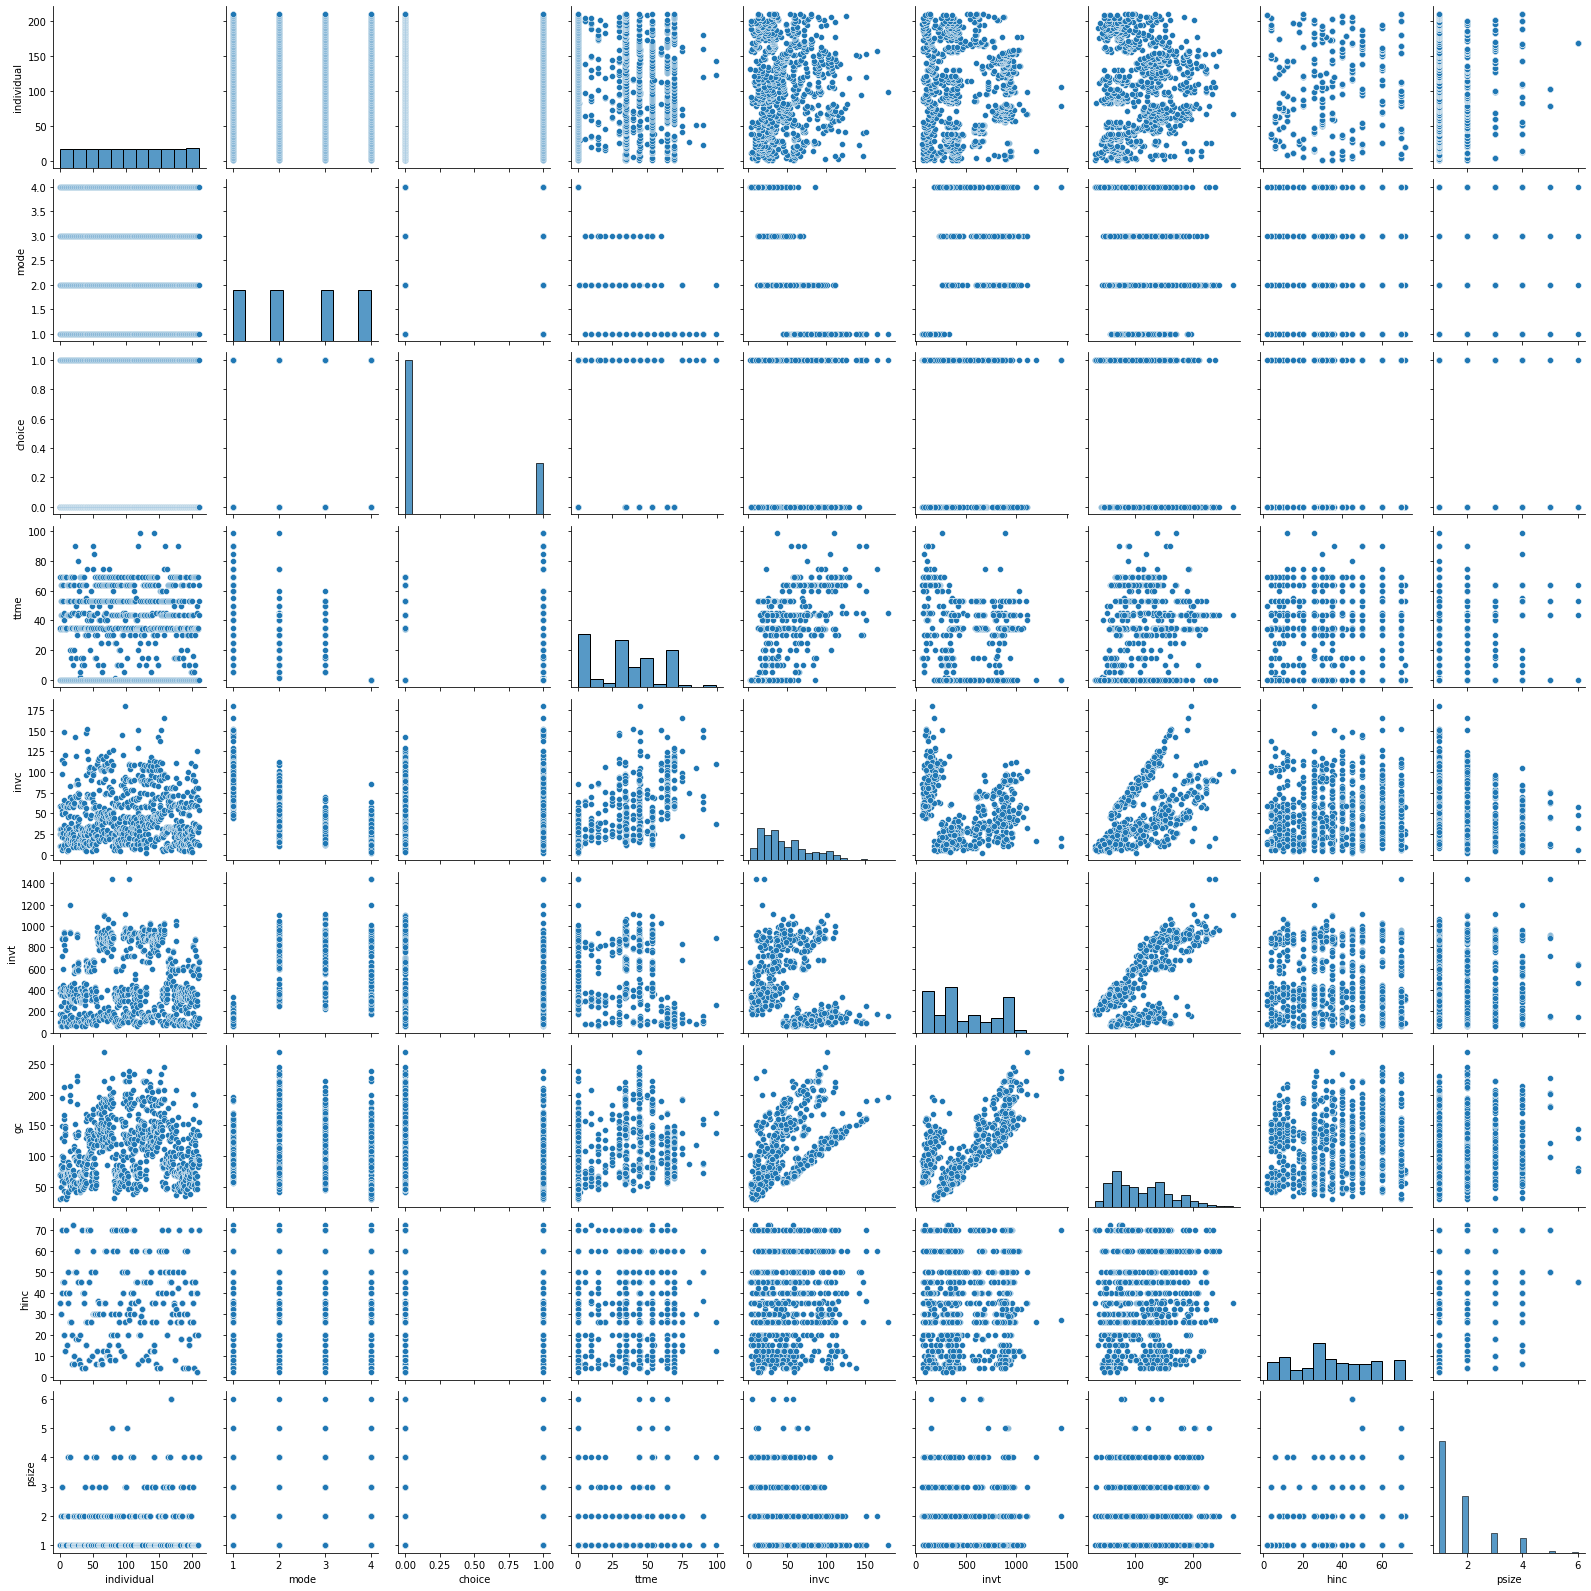

In [19]:
import seaborn as sns
sns.pairplot(modechoice)

### (b) Link functions
In this task we will run regressions with response `choice`, which is binary. Recall that 
binary regression uses **link functions**.
1. Explain what link functions are, and why they are needed.
2. Give three examples of link functions. What are the most popular link functions?

#### Solution
1. A link $F$ function transforms the linear combination $\beta^T X$ into the unit interval. They are needed because linear combinations can go outside the $[0,1]$ boundaries.
2. The logistic link and the Probit link are most popular. Other links include the cauchit, the cloglog, and any cumulative distribution function.


### (c) Confidence interval
Using a method from `statsmodel`, report the $95\%$ confidence intervals for the coefficients in the model `choice ~ ttme + invt + gc`. 

#### Solution


In [41]:
import statsmodels.formula.api as smf
smf.logit("choice ~ ttme + invt + gc", data = modechoice).fit().conf_int()

Optimization terminated successfully.
         Current function value: 0.499658
         Iterations 6


,0,1
Intercept,-0.166942,0.717055
ttme,-0.053605,-0.034576
invt,-0.005343,-0.003117
gc,0.011905,0.024855


### (d) Making predictions
Use the builtin functions of `statsmodels` to predict the value of `mode` for 
the model `choice ~ ttme + invt + gc` (do this for all the values in the data frame). 
Plot the observed values of `mode` on the $x$-axis against the predicted values on the
$y$-axis.


#### Solution

Optimization terminated successfully.
         Current function value: 0.499658
         Iterations 6


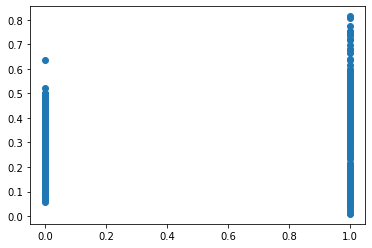

In [45]:
y = smf.logit("choice ~ ttme + invt + gc", data = modechoice).fit().predict()
plt.scatter(modechoice.choice, y)


## Task 3: The central limit theorem

### (a) Stating the central limit theorem
State the central limit theorem. Give two reasons why we care about it.

#### Solution
The central limit theorem says that $\sqrt{n}(\overline{X}_n - \mu) \to N(0,\sigma)$ 
when $X_i$ are iid with variance $\sigma^2$. Two possible reasons why we care about it since it gives us information
about the rate of convergence and because we can construct confidence intervals with it.

### (b) A counterexample to the central limit theorem?
Let $X_i, i=1 \ldots n$ be $n$ independent observations from a [Pareto distribution](https://en.wikipedia.org/wiki/Pareto_distribution) with shape parameter $\alpha = 2$ and scale $x_m = 1$, a distribution with expected value $2$. Alice claims that $\sqrt{n}(\overline{X_n} - 2)$ does not converge to a normal distribution. Explain why this would not contradict the central limit theorem.

#### Solution
The Pareto distribution with $\alpha = 2$ has infinite variance, which violates an 
assumption of the central limit theorem.

### (c) Distribution of the means
Using the setup from the previous exercise, simulate and plot the distribution of $\sqrt{n}(\overline{X_n} - 2)$ when $n = 1000.$ Does it
look normal? (***Hint:*** Use the [Numpy implementation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.pareto.html#numpy.random.Generator.pareto) to generate samples: `rng.pareto(a, size) + 1`. (You must add $1$ to make the scale correct). Compare the histogram to the appearance of "best-fitting" normal distribution by calculating the standard deviation of your simulated `np.sqrt(n) * (means - 2)`. Remember that `from scipy.stats import norm` imports the normal density.)  

#### Solution
No, it doesn't look normal at all. The plotted normal density is far away from the 
histogram. 

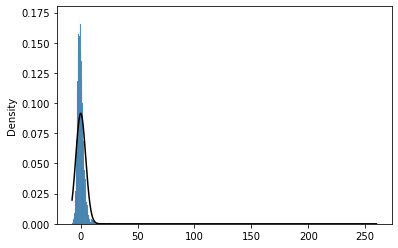

In [75]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

rng = np.random.default_rng(seed = 313)
n = 1000
n_reps = 10 ** 4
x = rng.pareto(2, (n_reps, n)) + 1
means = np.mean(x, 1)
sns.histplot(np.sqrt(n) * (means - 2), stat = "density")

z = np.sqrt(n) * (means - 2)
x_ = np.linspace(np.min(z), np.max(z), 10000)
plt.plot(x_, norm.pdf(x_, 0, np.std(z)), color = "black")



### (d) Understanding when the central limit theorem is of limited use
When will, in practice, the central limit theorem not be very useful? Give a general description and three examples. (***Hint:*** Look the wikipedia page for the [Pareto distribution](https://en.wikipedia.org/wiki/Pareto_distribution); also think about [Black Swans](https://en.wikipedia.org/wiki/The_Black_Swan:_The_Impact_of_the_Highly_Improbable).)


#### Solution
It won't be very useful in situations involving heavy tails. Examples include:
(a) Insurance data
(b) Stock market data. 
(c) Size of sand corns.

## Task 4: Distance functions in regression

### (a) The $l_p$ class of distance functions.
We define the $l_p$ distance between two observations as $$d_p(x,y) = |x-y|^p,\quad\textrm{when }0<p<\infty,$$ $$d_\infty(x, y) = \lim_{p\to\infty}{|x-y|^p},\textrm{ and}$$ $$d_0(x, y) = \lim_{p\to 0}{|x-y|^p}.$$

We can write $d_p(x,y) = f_p(x-y)$, where $f_p(z) = |z|^p$. Illustrate the $l_p$ distances for $p = 0.01, 0.1, 0.5, 1, 2, 3$, in the same window, using the function $f_p(z) = |z|^p$.

#### Solution


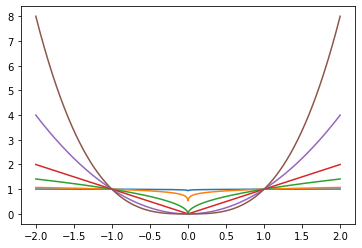

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-2, 2, 1000)
for p in [0.01, 0.1, 0.5, 1, 2, 3]:
    plt.plot(x, np.abs(x) ** p)


### (b) The $l_p$ class of distance functions (i).
Interpret the function $d_0(x, y)$. When would it make sense to use this distance function? (***Hint:*** We have discussed the function $1 - f_0(x)$ under another name in this course. Try some plotting to identify it.)

#### Solution
$1 - f_0(x)$ is the indicator function $1[x = 0]$. It makes sense to use this distance function
only care about perfect prediction.


### (c) The $l_p$ class of distance functions (ii).
Interpret the function $d_\infty(x, y)$. When, *if ever*, would it make sense to use this distance function? (***Hint:*** Try some plotting to identify it!)

#### Solution
$f_\infty(x)$ is the function that equals $1$ if $x = \pm 1$, $0$ when $x\in(-1,1)$, and $\infty$ otherwise. It probably never makes sense to use this function. It might make sense to use $1 - 1[x \in [-1,1]]$ if we don't care about "small" deviations from the true value, but not this function.


### (d) Choosing between distance functions.
1. Alice wants to use the function $d(x, y) = e^{x - y}$ as her distance function.
2. Bob, on the other hand, wants to use the function $d(x, y) = e^{(x - y)^2}$. 

Which one do you prefer, and why? (***Hint:*** Try plotting.)

#### Solution
I prefer Bob's function, since it is minimized when $x = y$. 